# Exploratory Data Analysis(Dilivery Time data)

In [1]:
#load the libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/acer/Documents/Excel r/Assignments/Simple linear regression/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#Data Structure 
type(data)
data.shape

(21, 2)

In [4]:
#data types
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

In [6]:
#Print the duplicated rows
data[data.duplicated()]

,Delivery Time,Sorting Time


# Outlier Detection

array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

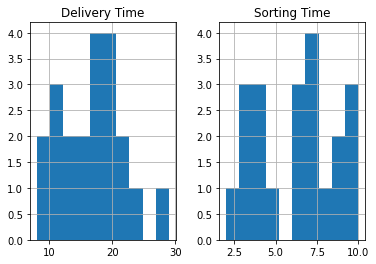

In [7]:

# histogram 
data.hist()

<AxesSubplot:>

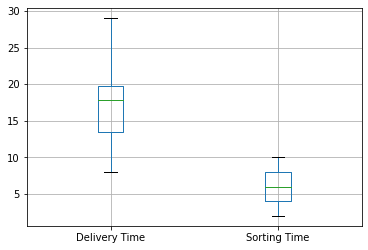

In [8]:
#Box plot
data.boxplot()

From this boxplot we can clearly see that their is no outliers in our data.

In [9]:
#Descriptive stat
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Checking Missing Values 

<AxesSubplot:>

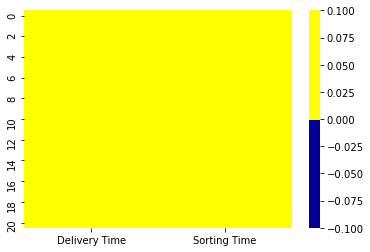

In [11]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [12]:
data[data.isnull().any(axis=1)].head()

,Delivery Time,Sorting Time


In [13]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

There are no missing values in our data.

# Scatter plot and correlation analysis

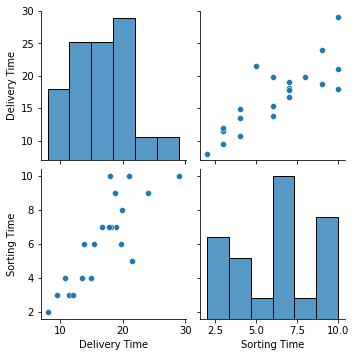

In [14]:
#Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [15]:
# Correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Transformation

In [16]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [17]:
data.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [18]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [19]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [20]:
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]]


# Speed up the EDA Process

In [23]:
#!pip install pandas_profiling
#!pip install sweetviz

In [24]:
#import pandas_profiling as pp
#import sweetviz as sv

In [25]:
#sweet_report = sv.analyze(data)
#sweet_report.show_html('Delivery Time.html')

In [26]:
#EDA_report= pp.ProfileReport(data)
#EDA_report.to_file(output_file='report.html'

# 1) Delivery_time -> Predict delivery time using sorting time 


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

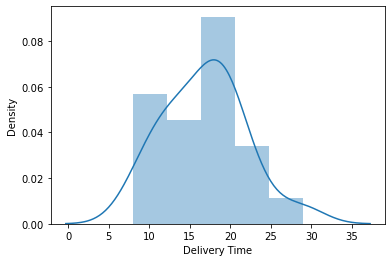

In [21]:
import seaborn as sns
sns.distplot(data['Delivery Time'])


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

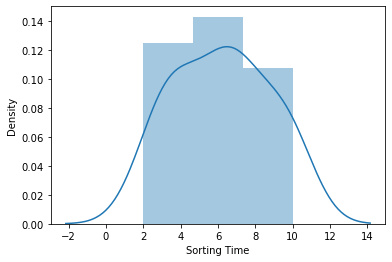

In [22]:
sns.distplot(data['Sorting Time'])

Here we say that data shows the bell shaped curve so we can say that dilivery time and sorting time are normally distributed.

In [23]:
Y=data["Delivery Time"]     # Dependent variable
X=data["Sorting Time"]      # Independent variable

In [24]:
# Fitting Linear Regression Model
import statsmodels.formula.api as smf
model = smf.ols("Y~X",data = data).fit()

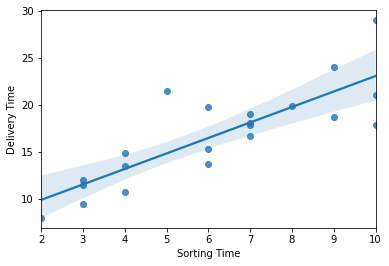

In [25]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

In [26]:
#Coefficients
model.params

Intercept    6.582734
X            1.649020
dtype: float64

The equation of linear regression is
Y= 6.582734 +(1.649020)*Sorting time

In [27]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
X            6.387447
dtype: float64 
 Intercept    0.001147
X            0.000004
dtype: float64


In [28]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Here R-squared value is 0.6822 that means that 68.22% of Variation in delivery time is explained by the sorting time. 


In [31]:
#Log Transformation on the data
from numpy import exp
newdata=exp(data)

In [32]:
newdata.head()

,Delivery Time,Sorting Time
0,1.318816e+09,22026.465795
1,7.294164e+05,54.598150
2,3.778470e+08,403.428793
3,2.648912e+10,8103.083928
4,3.931334e+12,22026.465795


In [33]:
newdata.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [38]:
# Fitting Linear Regression Model
import statsmodels.formula.api as smf
model1 = smf.ols("Y~X",data =newdata).fit()

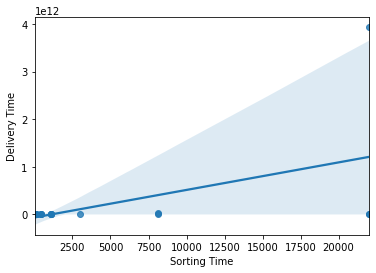

In [39]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=newdata);

In [40]:
#coefficients
model1.params

Intercept    6.582734
X            1.649020
dtype: float64

In [41]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)    

Intercept    3.823349
X            6.387447
dtype: float64 
 Intercept    0.001147
X            0.000004
dtype: float64


In [42]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

R squared values for both the models are approximately same.

#  Predict for new data point

In [43]:
#Predict for 5, 7 sorting time
newdata=pd.Series([5,7])

In [35]:
data_pred=pd.DataFrame(newdata,columns=['X'])

In [36]:
model.predict(data_pred)

0    14.827833
1    18.125873
dtype: float64

# Exploratory Data Analysis(Salary Hike data)

In [37]:
#load the libraries
import pandas as pd
import numpy as np

In [38]:
#Import Data set
data1= pd.read_csv("C:/Users/acer/Documents/Excel r/Assignments/Simple linear regression/Salary_Data.csv")
data1.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [39]:
#Data Structure 
type(data1)
data1.shape

(30, 2)

In [40]:
#data Types
data1.dtypes


YearsExperience    float64
Salary               int64
dtype: object

In [41]:
#Count of duplicated rows
data1[data1.duplicated()].shape

(0, 2)

In [43]:
#print duplicated rows
data1[data1.duplicated()]

,YearsExperience,Salary


# Outlier Detection

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

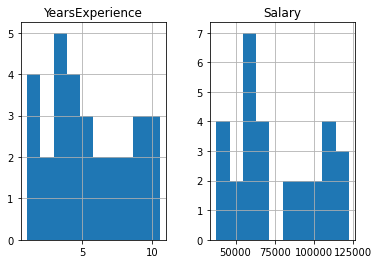

In [44]:
# Histogram
data1.hist()

<AxesSubplot:>

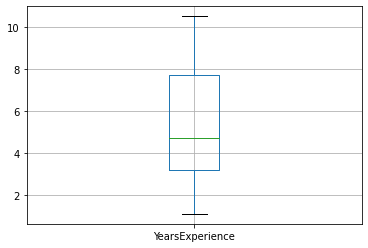

In [49]:
#Boxplot
data1.boxplot(column=["YearsExperience"])

<AxesSubplot:>

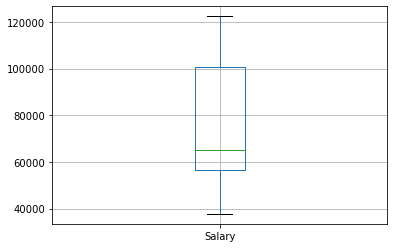

In [50]:
data1.boxplot(column=["Salary"])

In [51]:
#Descriptive stat
data1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Here we see that there are no outliers in the data

# Checking Missing Values

<AxesSubplot:>

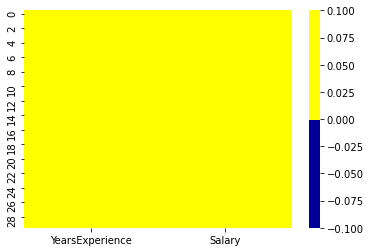

In [52]:
import seaborn as sns
cols = data1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [53]:
data1[data1.isnull().any(axis=1)].head()

,YearsExperience,Salary


In [54]:
data1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Scatterplot and correlation analysis

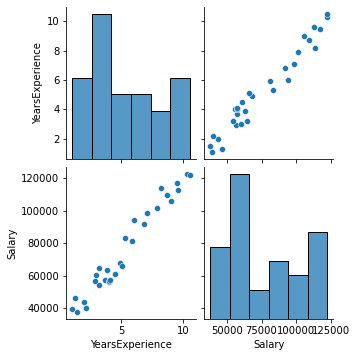

In [55]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data1)

In [56]:
#Correlation
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Transformation

In [57]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [58]:
data1.values

array([[1.10e+00, 3.93e+04],
       [1.30e+00, 4.62e+04],
       [1.50e+00, 3.77e+04],
       [2.00e+00, 4.35e+04],
       [2.20e+00, 3.99e+04],
       [2.90e+00, 5.66e+04],
       [3.00e+00, 6.02e+04],
       [3.20e+00, 5.44e+04],
       [3.20e+00, 6.44e+04],
       [3.70e+00, 5.72e+04],
       [3.90e+00, 6.32e+04],
       [4.00e+00, 5.58e+04],
       [4.00e+00, 5.70e+04],
       [4.10e+00, 5.71e+04],
       [4.50e+00, 6.11e+04],
       [4.90e+00, 6.79e+04],
       [5.10e+00, 6.60e+04],
       [5.30e+00, 8.31e+04],
       [5.90e+00, 8.14e+04],
       [6.00e+00, 9.39e+04],
       [6.80e+00, 9.17e+04],
       [7.10e+00, 9.83e+04],
       [7.90e+00, 1.01e+05],
       [8.20e+00, 1.14e+05],
       [8.70e+00, 1.09e+05],
       [9.00e+00, 1.06e+05],
       [9.50e+00, 1.17e+05],
       [9.60e+00, 1.13e+05],
       [1.03e+01, 1.22e+05],
       [1.05e+01, 1.22e+05]])

In [59]:
array = data1.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [60]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [61]:
array = data1.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.51 -1.36]
 [-1.44 -1.11]
 [-1.37 -1.42]
 [-1.19 -1.2 ]
 [-1.12 -1.34]]


# 2) Salary_hike -> Build a prediction model for Salary_hike


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

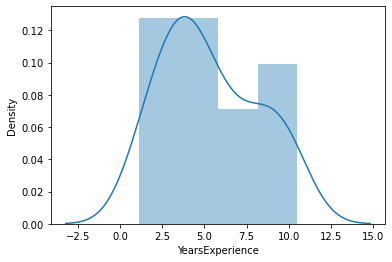

In [63]:
import seaborn as sns
sns.distplot(data1['YearsExperience'])


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

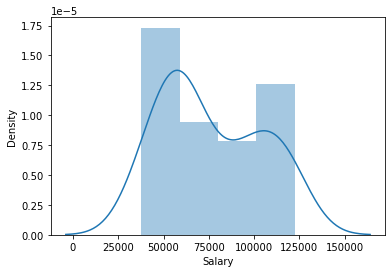

In [66]:
sns.distplot(data1['Salary'])

In [73]:
# Fitting Linear Regression Model
import statsmodels.formula.api as smf
model1 = smf.ols("Salary~YearsExperience",data = data1).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

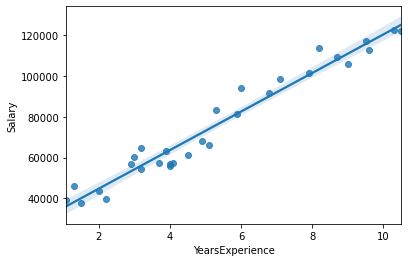

In [74]:
sns.regplot(x="YearsExperience", y="Salary", data=data1)

In [75]:
#Coefficients
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

The equation of regression Salary= 25792.2200199+ 9449.962321* YearsExperience

In [76]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [77]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Here we have r-squared = 0.9569 so we can say that 95.67% of variation in Salary is Explained by Years of experience.